<a href="https://colab.research.google.com/github/CodeCognos/CodeCognos/blob/main/Movie_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Steps :
1. Read the file and name it as corpus
2.Text preprocessing : remove any numbers or charachters
3.covert the corpus into lowercase and split
4.Tokenization the corpus into documents  :word_tokenize  
3.split the documents into words
4.stemming and lemetiztions
5.tf idf
6.word to vec

In [23]:
 pip install nltk

In [116]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [25]:
#step 1 : read the file
file_path ='/content/train_data.txt'
df = pd.read_csv(file_path, sep=':::', header=None,names=['Movie Name','Genre','Description'])

<ipython-input-25-1d0e4cee88c3>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=':::', header=None,names=['Movie Name','Genre','Description'])


In [26]:
df.head(2)

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...


In [13]:
#we have to predict movie genre based on description so i think we need only movie gebnre and descrition columnand we should remove the movie name column

In [27]:
df1 =df.drop('Movie Name',axis =1)
df1

,Genre,Description
1,drama,Listening in to a conversation between his do...
2,thriller,A brother and sister with a past incestuous r...
3,adult,As the bus empties the students for their fie...
4,drama,To help their unemployed father make ends mee...
5,drama,The film's title refers not only to the un-re...
...,...,...
54210,comedy,This short-lived NBC live sitcom centered on ...
54211,horror,The NEXT Generation of EXPLOITATION. The sist...
54212,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,comedy,Walter and Vivian live in the country and hav...


In [85]:
type(df1)

pandas.core.frame.DataFrame

In [16]:
#Check for null values
df1.isna().sum()


Genre          0
Description    0
dtype: int64

In [19]:
#There are no null values in the dataset. But for training data we only need description column

In [20]:
'''lower
word_tokenize
lemmetiztion and stemming
stop words
tf-idf vectorizer '''




'lower \nword_tokenize\nlemmetiztion and stemming \nstop words \ntf-idf vectorizer '

In [35]:
genre = df1['Genre'].value_counts()
type(genre)

pandas.core.series.Series

In [36]:
genre

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

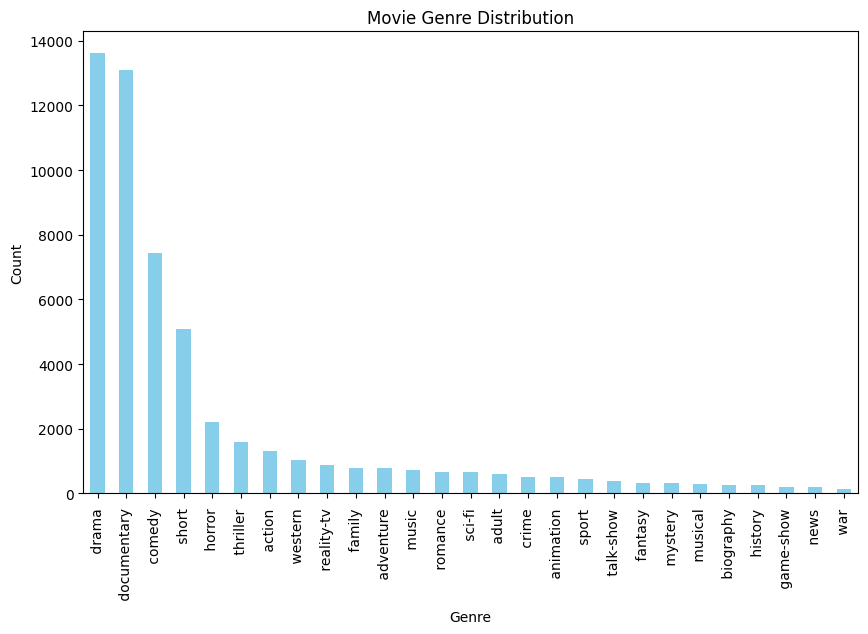

In [200]:
plt.figure(figsize =(10,6))
genre.plot(kind='bar', color ='skyblue')
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [38]:
#Text preprocessing
'''
1.Remove unrequired characters,numbers etc and convert into lower case
2.Tokenization into words
3.stemming
4.Remove stopwords
5.Use tf-idf to convert into vectors
or Use word2vec
'''

'\n1.Remove unrequired characters,numbers etc and convert into lower case\n2.Tokenization into words \n3.stemming \n4.Remove stopwords\n5.Use tf-idf to convert into vectors \nor Use word2vec\n'

In [39]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [124]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
df1['Description'] =df1['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

#remove all the other characters except alphabets

In [112]:
df1['Description'] = df1['Description'].astype(str).str.lower()


In [117]:
df1['Description']

1         listening in to a conversation between his do...
2         a brother and sister with a past incestuous r...
3         as the bus empties the students for their fie...
4         to help their unemployed father make ends mee...
5         the films title refers not only to the unreco...
                               ...                        
54210     this shortlived nbc live sitcom centered on b...
54211     the next generation of exploitation the siste...
54212     ze bestaan echt is a standup comedy about gro...
54213     walter and vivian live in the country and hav...
54214     on labor day weekend  the most intense hurric...
Name: Description, Length: 54214, dtype: object

In [123]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [153]:
tokens = df1['Description'].apply(word_tokenize).astype(str)

In [154]:
tokens

1        ['listening', 'in', 'to', 'a', 'conversation',...
2        ['a', 'brother', 'and', 'sister', 'with', 'a',...
3        ['as', 'the', 'bus', 'empties', 'the', 'studen...
4        ['to', 'help', 'their', 'unemployed', 'father'...
5        ['the', 'films', 'title', 'refers', 'not', 'on...
                               ...                        
54210    ['this', 'shortlived', 'nbc', 'live', 'sitcom'...
54211    ['the', 'next', 'generation', 'of', 'exploitat...
54212    ['ze', 'bestaan', 'echt', 'is', 'a', 'standup'...
54213    ['walter', 'and', 'vivian', 'live', 'in', 'the...
54214    ['on', 'labor', 'day', 'weekend', 'the', 'most...
Name: Description, Length: 54214, dtype: object

In [155]:
porter_stemmer = PorterStemmer()

In [161]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
stop_words =set(stopwords.words('english'))

In [165]:
tokens =[porter_stemmer.stem(word) for word in tokens if word not in stop_words]

In [180]:
from nltk.stem import WordNetLemmatizer

In [184]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [185]:
lemmatizer =WordNetLemmatizer()
tokens =[lemmatizer.lemmatize(word) for word in tokens]

In [166]:
tokens

["['listening', 'in', 'to', 'a', 'conversation', 'between', 'his', 'doctor', 'and', 'parents', 'yearold', 'oscar', 'learns', 'what', 'nobody', 'has', 'the', 'courage', 'to', 'tell', 'him', 'he', 'only', 'has', 'a', 'few', 'weeks', 'to', 'live', 'furious', 'he', 'refuses', 'to', 'speak', 'to', 'anyone', 'except', 'straighttalking', 'rose', 'the', 'lady', 'in', 'pink', 'he', 'meets', 'on', 'the', 'hospital', 'stairs', 'as', 'christmas', 'approaches', 'rose', 'uses', 'her', 'fantastical', 'experiences', 'as', 'a', 'professional', 'wrestler', 'her', 'imagination', 'wit', 'and', 'charm', 'to', 'allow', 'oscar', 'to', 'live', 'life', 'and', 'love', 'to', 'the', 'full', 'in', 'the', 'company', 'of', 'his', 'friends', 'pop', 'corn', 'einstein', 'bacon', 'and', 'childhood', 'sweetheart', 'peggy', 'blue']",
 "['a', 'brother', 'and', 'sister', 'with', 'a', 'past', 'incestuous', 'relationship', 'have', 'a', 'current', 'murderous', 'relationship', 'he', 'murders', 'the', 'women', 'who', 'reject', '

In [171]:
X = tokens
y=df1['Genre']

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =42)

In [187]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf =tfidf_vectorizer.fit_transform(X_test)

In [188]:
classifier =MultinomialNB()
classifier.fit(X_train_tfidf,y_train)

MultinomialNB()

In [189]:
y_pred =classifier.predict(X_test_tfidf)

In [190]:
accuracy =accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.24771742137784747


In [178]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      action        0.07      0.02      0.03       263
       adult        0.09      0.04      0.05       112
   adventure        0.04      0.06      0.05       139
   animation        0.07      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.17      0.23      0.20      1443
       crime        0.05      0.04      0.04       107
 documentary        0.35      0.44      0.39      2659
       drama        0.33      0.35      0.34      2697
      family        0.01      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.12      0.04      0.06       431
       music        0.10      0.07      0.08       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression

In [196]:
word2vec_model = Word2Vec(sentences=X, vector_size=100, min_count=1, workers=4)

In [197]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

In [198]:
X_word2vec = [average_word_vectors(words, word2vec_model, word2vec_model.wv.index_to_key, 100) for words in X]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [202]:
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.36272249377478555

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.27      0.07      0.11      1443
       crime        0.00      0.00      0.00       107
 documentary        0.42      0.71      0.53      2659
       drama        0.33      0.72      0.45      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
